face3d.shape (3, 68)


Text(0.5, 1.0, 'Figure1: 2D facial landmarks')

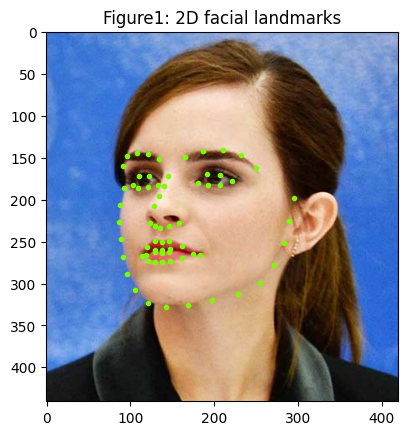

In [88]:
from tkinter import image_names
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin, atan2, sqrt, degrees
%matplotlib inline
img_name = 'emma_watson'
face2d = np.load(img_name + '.npy')
face2d = face2d.astype('float32')
face3d = np.load('basel_68_pts.npy')
# Do not change the following two lines
face3d[1,:] *= -1
face3d[2,:] *= -1
print('face3d.shape', face3d.shape)
# TODO1: Display the 2D landmarks
img = cv2.imread('emma_watson.jpg')
img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.figure()
plt.imshow(img_bgr)
plt.plot(face2d[0,:], face2d[1,:], color='lawngreen', marker='.', linestyle='')
plt.title('Figure1: 2D facial landmarks')

In [89]:
# TODO 2: Pose estimation
f = np.max(img.shape[:2])
cx = img.shape[:2][1]/2
cy = img.shape[:2][0]/2
intrinsic_matrix = np.array([[f, 0, cx],
                             [0, f, cy],
                             [0, 0, 1]])
_, rotvec, transvec = cv2.solvePnP(face3d.T, face2d.T, intrinsic_matrix, None)
rot_mat = cv2.Rodrigues(rotvec)[0]
euler_ang = sqrt(rot_mat[0][0]**2+rot_mat[1][0]**2)
if euler_ang >= 1e-6:
  pitch = atan2(rot_mat[2, 1], rot_mat[2, 2])
  yaw = atan2(-rot_mat[2, 0], euler_ang)
  roll = atan2(rot_mat[1, 0], rot_mat[0, 0])
else:
  pitch = -atan2(rot_mat[1, 2], rot_mat[1, 1])
  yaw = atan2(-rot_mat[2, 0], euler_ang)
  roll = 0
pitch, yaw, roll = degrees(pitch), degrees(yaw), degrees(roll)
print(f"pitch: {pitch}, yaw: {yaw}, roll: {roll}")

pitch: -2.6136064788718545, yaw: 14.336056927183353, roll: 3.7226550223346324


Text(0.5, 1.0, 'Figure2')

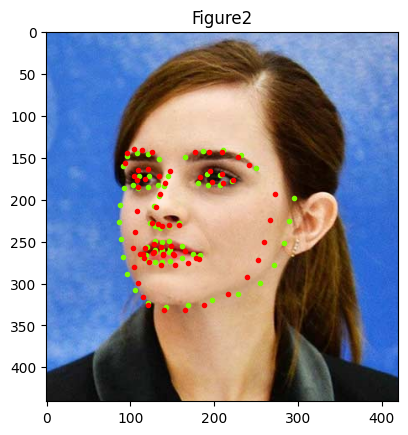

In [90]:
# TODO 3: Compute the reprojected 2D landmarks, face2d_repr
def face3d2face2d(face3d_mat, k, r, t):
  def get_mi_hat(input_arr, idx, k, r, t):
    ext_matrix = np.hstack([r, t])
    mi_hat = k.dot(ext_matrix).dot(np.vstack([np.array([input_arr[:, idx]]).T, [1]]))
    mi = np.array([mi_hat[0]/mi_hat[2],
                  mi_hat[1]/mi_hat[2]])
    return mi
  m = np.array([get_mi_hat(face3d_mat, idx, k, r, t) for idx in range(face3d_mat.shape[1])]).squeeze().T
  return m

k = intrinsic_matrix
r = rot_mat
t = transvec
face2d_repr = face3d2face2d(face3d, k, r, t)

# draw figure
plt.figure()
plt.imshow(img_bgr)
plt.plot(face2d[0,:], face2d[1,:], color='lawngreen', marker='.', linestyle='')
plt.plot(face2d_repr[0,:], face2d_repr[1,:], 'r.')
plt.title("Figure2")

In [91]:
# TODO 4: Print the reprojection error
def cal_repr_error(face2d_mat, face2d_repr_mat, landmark_num):
  repr_err = sum([sqrt((face2d_mat[0, idx]-face2d_repr_mat[0,idx])**2+(face2d_mat[1, idx]-face2d_repr_mat[1,idx])**2) for idx in range(landmark_num)]) / landmark_num
  return repr_err

repr_err = cal_repr_error(face2d, face2d_repr, 68)
print(f"reprojection error : {repr_err}")

reprojection error : 8.262862360060064


pitch_51: -7.445891805238441, yaw_51: 17.14330569529927, roll_51: 1.235313065746079
reprojection error 51 point : 4.22063027231453


Text(0.5, 1.0, 'Figure3')

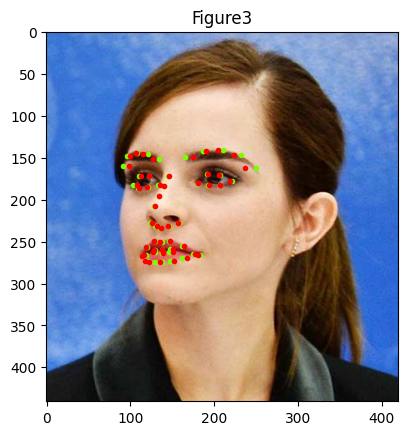

In [92]:
# TODO 5: Repeat TODO 2 ~ TODO 4 using 51 landmarks
face3d51 = face3d[:,-51:]
face2d51 = face2d[:,-51:]
# repeat todo2 with 51 landmark
f = np.max(img.shape[:2])
cx = img.shape[:2][1]/2
cy = img.shape[:2][0]/2
intrinsic_matrix = np.array([[f, 0, cx],
                             [0, f, cy],
                             [0, 0, 1]])
_, rotvec_51, transvec_51 = cv2.solvePnP(face3d51.T, face2d51.T, intrinsic_matrix, None)
rot_mat_51 = cv2.Rodrigues(rotvec_51)[0]
euler_ang_51 = sqrt(rot_mat_51[0][0]**2+rot_mat_51[1][0]**2)
if euler_ang_51 >= 1e-6:
  pitch_51 = atan2(rot_mat_51[2, 1], rot_mat_51[2, 2])
  yaw_51 = atan2(-rot_mat_51[2, 0], euler_ang_51)
  roll_51 = atan2(rot_mat_51[1, 0], rot_mat_51[0, 0])
else:
  pitch_51 = -atan2(rot_mat_51[1, 2], rot_mat_51[1, 1])
  yaw_51 = atan2(-rot_mat_51[2, 0], euler_ang_51)
  roll_51 = 0
pitch_51, yaw_51, roll_51 = degrees(pitch_51), degrees(yaw_51), degrees(roll_51)
print(f"pitch_51: {pitch_51}, yaw_51: {yaw_51}, roll_51: {roll_51}")
# repeat todo3
def face3d2face2d(face3d_mat, k, r, t):
  def get_mi_hat(input_arr, idx, k, r, t):
    ext_matrix = np.hstack([r, t])
    mi_hat = k.dot(ext_matrix).dot(np.vstack([np.array([input_arr[:, idx]]).T, [1]]))
    mi = np.array([mi_hat[0]/mi_hat[2],
                  mi_hat[1]/mi_hat[2]])
    return mi
  m = np.array([get_mi_hat(face3d_mat, idx, k, r, t) for idx in range(face3d_mat.shape[1])]).squeeze().T
  return m

k = intrinsic_matrix
r_51 = rot_mat_51
t_51 = transvec_51
face2d_repr_51 = face3d2face2d(face3d51, k, r_51, t_51)
#repeat todo4
def cal_repr_error(face2d_mat, face2d_repr_mat, landmark_num):
  repr_err = sum([sqrt((face2d_mat[0, idx]-face2d_repr_mat[0,idx])**2+(face2d_mat[1, idx]-face2d_repr_mat[1,idx])**2) for idx in range(landmark_num)]) / landmark_num
  return repr_err

repr_err_51 = cal_repr_error(face2d51, face2d_repr_51, 51)
print(f"reprojection error 51 point : {repr_err_51}")
#plot Fig
plt.figure()
plt.imshow(img_bgr)
plt.plot(face2d51[0,:], face2d51[1,:], color='lawngreen', marker='.', linestyle='')
plt.plot(face2d_repr_51[0,:], face2d51[1,:], color='red', marker='.', linestyle='')
plt.title("Figure3")

# Question 1:
## Which is better to perform pose estimation, using 68 points or using 51 points? 

# ANS:
51 points landmark have better pose estimation, because 51 points landmark have a lower reprojection error 4.22 compare to the value 8.26 from 68 points landmark

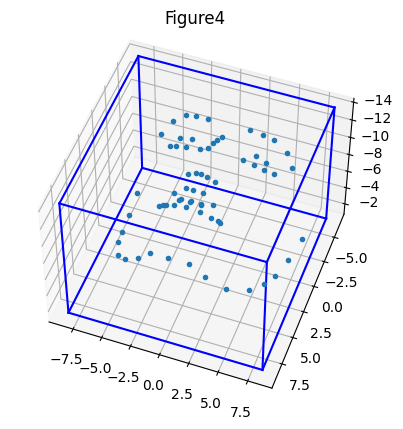

Text(0.5, 1.0, 'Figure5')

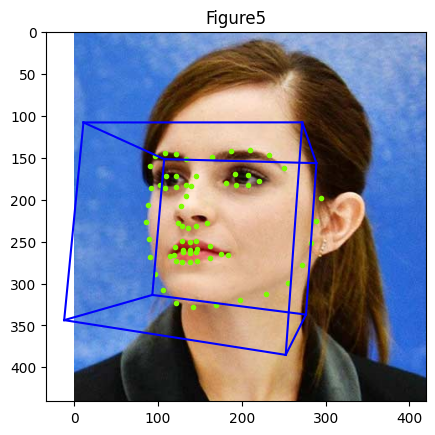

In [100]:
# TODO 6: Augmented reality
def get_vertices(landmarks):
  xmin = np.amin(landmarks[0,:])-1
  xmax = np.amax(landmarks[0,:])+1
  ymin = np.amin(landmarks[1,:])-1
  ymax = np.amax(landmarks[1,:])+1
  zmin = np.amin(landmarks[2,:])-1
  zmax = np.amax(landmarks[2,:])+1
  return [xmin, xmax, ymin, ymax, zmin, zmax]

def draw_vertices_3d(vertice_ls, landmarks):
  fig4 = plt.figure()
  ax = plt.axes(projection='3d')
  # xmin to x max
  ax.plot([vertice_ls[0], vertice_ls[1]], [vertice_ls[2], vertice_ls[2]], [vertice_ls[4], vertice_ls[4]], 'b')
  ax.plot([vertice_ls[0], vertice_ls[1]], [vertice_ls[2], vertice_ls[2]], [vertice_ls[5], vertice_ls[5]], 'b')
  ax.plot([vertice_ls[0], vertice_ls[1]], [vertice_ls[3], vertice_ls[3]], [vertice_ls[4], vertice_ls[4]], 'b')
  ax.plot([vertice_ls[0], vertice_ls[1]], [vertice_ls[3], vertice_ls[3]], [vertice_ls[5], vertice_ls[5]], 'b')
  # ymin to ymax
  ax.plot([vertice_ls[0], vertice_ls[0]], [vertice_ls[2], vertice_ls[3]], [vertice_ls[4], vertice_ls[4]], 'b')
  ax.plot([vertice_ls[0], vertice_ls[0]], [vertice_ls[2], vertice_ls[3]], [vertice_ls[5], vertice_ls[5]], 'b')
  ax.plot([vertice_ls[1], vertice_ls[1]], [vertice_ls[2], vertice_ls[3]], [vertice_ls[4], vertice_ls[4]], 'b')
  ax.plot([vertice_ls[1], vertice_ls[1]], [vertice_ls[2], vertice_ls[3]], [vertice_ls[5], vertice_ls[5]], 'b')
  # zmin to zmax
  ax.plot([vertice_ls[0], vertice_ls[0]], [vertice_ls[2], vertice_ls[2]], [vertice_ls[4], vertice_ls[5]], 'b')
  ax.plot([vertice_ls[0], vertice_ls[0]], [vertice_ls[3], vertice_ls[3]], [vertice_ls[4], vertice_ls[5]], 'b')
  ax.plot([vertice_ls[1], vertice_ls[1]], [vertice_ls[2], vertice_ls[2]], [vertice_ls[4], vertice_ls[5]], 'b')
  ax.plot([vertice_ls[1], vertice_ls[1]], [vertice_ls[3], vertice_ls[3]], [vertice_ls[4], vertice_ls[5]], 'b')
  
  ax.plot(landmarks[0,:], landmarks[1,:], landmarks[2,:], '.')
  ax.view_init(230, 250, 0)
  plt.title('Figure4')
  plt.show()
  pass

# main
draw_vertices_3d(get_vertices(face3d), face3d)
xmin, xmax, ymin, ymax, zmin, zmax = get_vertices(face3d)
vertices = np.array(
  [[xmin, ymin, zmin],
   [xmax, ymin, zmin],
   [xmax, ymax, zmin],
   [xmin, ymax, zmin],
   [xmin, ymin, zmax],
   [xmax, ymin, zmax],
   [xmax, ymax, zmax],
   [xmin, ymax, zmax]]
).T
vertices_2d = face3d2face2d(vertices, k, r, t)

def draw_vertices_2d(vertice_ls):
  # plot vertice
  plt.plot([vertice_ls[:,0][0], vertice_ls[:,1][0]], [vertice_ls[:,0][1], vertice_ls[:,1][1]], 'b')
  plt.plot([vertice_ls[:,2][0], vertice_ls[:,3][0]], [vertice_ls[:,2][1], vertice_ls[:,3][1]], 'b')
  plt.plot([vertice_ls[:,6][0], vertice_ls[:,7][0]], [vertice_ls[:,6][1], vertice_ls[:,7][1]], 'b')
  plt.plot([vertice_ls[:,4][0], vertice_ls[:,5][0]], [vertice_ls[:,4][1], vertice_ls[:,5][1]], 'b')
  plt.plot([vertice_ls[:,0][0], vertice_ls[:,3][0]], [vertice_ls[:,0][1], vertice_ls[:,3][1]], 'b')
  plt.plot([vertice_ls[:,4][0], vertice_ls[:,7][0]], [vertice_ls[:,4][1], vertice_ls[:,7][1]], 'b')
  plt.plot([vertice_ls[:,1][0], vertice_ls[:,2][0]], [vertice_ls[:,1][1], vertice_ls[:,2][1]], 'b')
  plt.plot([vertice_ls[:,5][0], vertice_ls[:,6][0]], [vertice_ls[:,5][1], vertice_ls[:,6][1]], 'b')
  plt.plot([vertice_ls[:,0][0], vertice_ls[:,4][0]], [vertice_ls[:,0][1], vertice_ls[:,4][1]], 'b')
  plt.plot([vertice_ls[:,3][0], vertice_ls[:,7][0]], [vertice_ls[:,3][1], vertice_ls[:,7][1]], 'b')
  plt.plot([vertice_ls[:,1][0], vertice_ls[:,5][0]], [vertice_ls[:,1][1], vertice_ls[:,5][1]], 'b')
  plt.plot([vertice_ls[:,2][0], vertice_ls[:,6][0]], [vertice_ls[:,2][1], vertice_ls[:,6][1]], 'b')
  pass
# plot fig5
plt.figure()
plt.imshow(img_bgr)
plt.plot(face2d[0,:], face2d[1,:], color='lawngreen', marker='.', linestyle='')
draw_vertices_2d(vertices_2d)
plt.title("Figure5")
